Installation

In [1]:
!pip install -U ray[rllib]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.9 MB/s eta 0:00:00


Ray RLlib algorithms

In [2]:
# from ray.rllib.algorithms.ppo import PPOConfig
# from ray.tune.logger import pretty_print


# algo = (
#     PPOConfig()
#     .rollouts(num_rollout_workers=1)
#     .resources(num_gpus=0)
#     .environment(env="CartPole-v1")
#     .build()
# )

# for i in range(10):
#     result = algo.train()
#     print(pretty_print(result))

#     if i % 5 == 0:
#         checkpoint_dir = algo.save().checkpoint.path
#         print(f"Checkpoint saved in directory {checkpoint_dir}")

/usr/local/lib/python3.10/dist-packages/flax/configurations.py:42: DeprecationWarning: jax.config.define_bool_state is deprecated. Please use other libraries for configuration instead.
  return jax_config.define_bool_state('flax_' + name, default, help)
/usr/local/lib/python3.10/dist-packages/flax/linen/activation.py:36: DeprecationWarning: jax.nn.normalize is deprecated. Use jax.nn.standardize instead.
  from jax.nn import normalize
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
/usr/local/lib/python3.10/dist-packages/ray/rllib/algorithms/algorithm.py:483: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  return Unified

agent_timesteps_total: 4000
connector_metrics:
  ObsPreprocessorConnector_ms: 0.007475673823066838
  StateBufferConnector_ms: 0.005937412957460182
  ViewRequirementAgentConnector_ms: 0.15203992306198205
counters:
  num_agent_steps_sampled: 4000
  num_agent_steps_trained: 4000
  num_env_steps_sampled: 4000
  num_env_steps_trained: 4000
custom_metrics: {}
date: 2024-01-22_14-58-21
done: false
episode_len_mean: 22.099447513812155
episode_media: {}
episode_reward_max: 109.0
episode_reward_mean: 22.099447513812155
episode_reward_min: 9.0
episodes_this_iter: 181
episodes_total: 181
hostname: b1ba9acc03c4
info:
  learner:
    default_policy:
      custom_metrics: {}
      diff_num_grad_updates_vs_sampler_policy: 464.5
      learner_stats:
        allreduce_latency: 0.0
        cur_kl_coeff: 0.20000000000000004
        cur_lr: 5.0000000000000016e-05
        entropy: 0.6666416097712773
        entropy_coeff: 0.0
        grad_gnorm: 1.665345492862886
        kl: 0.026704132502504276
        poli

In [ ]:
# from ray.rllib.algorithms.ppo import PPOConfig
# config = PPOConfig()
# config = config.training(gamma=0.9, lr=0.01, kl_coeff=0.3,
#     train_batch_size=128)
# config = config.resources(num_gpus=0)
# config = config.rollouts(num_rollout_workers=1)

# # Build a Algorithm object from the config and run 1 training iteration.
# algo = config.build(env="CartPole-v1")
# algo.train()

All RLlib algorithms are compatible with the Tune API

In [2]:
import os
import ray
from ray import train, tune
from ray.rllib.algorithms.ppo import PPOConfig
from ray.tune import ResultGrid

storage_path = "/tmp/ray_results"
exp_name = "tune_analyzing_results"

config = PPOConfig()
config.training(lr=tune.grid_search([0.01, 0.001, 0.0001]))
config.rollouts(num_rollout_workers=1)
config = config.environment(env="CartPole-v1")

tuner = tune.Tuner(
    "PPO",
    param_space=config.to_dict(),
    run_config=train.RunConfig(
        name=exp_name,
        stop={"training_iteration": 100},
        checkpoint_config=train.CheckpointConfig(
            checkpoint_score_attribute='episode_reward_mean',
            num_to_keep=5
        ),
        storage_path=storage_path
    )
)

results_grid: ResultGrid = tuner.fit()

/usr/local/lib/python3.10/dist-packages/flax/configurations.py:42: DeprecationWarning: jax.config.define_bool_state is deprecated. Please use other libraries for configuration instead.
  return jax_config.define_bool_state('flax_' + name, default, help)
/usr/local/lib/python3.10/dist-packages/flax/linen/activation.py:36: DeprecationWarning: jax.nn.normalize is deprecated. Use jax.nn.standardize instead.
  from jax.nn import normalize
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
/usr/local/lib/python3.10/dist-packages/gymnasium/spaces/box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:164: UserWarning: WARN: The obs re

+-----------------------------------------------------------+
| Configuration for experiment     tune_analyzing_results   |
+-----------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator    |
| Scheduler                        FIFOScheduler            |
| Number of trials                 3                        |
+-----------------------------------------------------------+

View detailed results here: /tmp/ray_results/tune_analyzing_results
To visualize your results with TensorBoard, run: `tensorboard --logdir /root/ray_results/tune_analyzing_results`

Trial status: 3 PENDING
Current time: 2024-01-23 12:28:26. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/0 GPUs
+-------------------------------------------------+
| Trial name                    status         lr |
+-------------------------------------------------+
| PPO_CartPole-v1_e81f9_00000   PENDING    0.01   |
| PPO_CartPole-v1_e81f9_00001   PENDING    0.001  

(pid=914) /usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
(pid=914)   warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
(pid=914) /usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
(pid=914) Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
(pid=914)   declare_namespace(pkg)
(pid=914) /usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
(pid=914) Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/


Trial PPO_CartPole-v1_e81f9_00000 started with configuration:
+---------------------------------------------------------------------------+
| Trial PPO_CartPole-v1_e81f9_00000 config                                  |
+---------------------------------------------------------------------------+
| _AlgorithmConfig__prior_exploration_config                                |
| _disable_action_flattening                                          False |
| _disable_execution_plan_api                                          True |
| _disable_initialize_loss_from_dummy_batch                           False |
| _disable_preprocessor_api                                           False |
| _enable_new_api_stack                                               False |
| _fake_gpus                                                          False |
| _is_atari                                                                 |
| _learner_class                                                            |
|

(PPO pid=914) Trainable.setup took 12.047 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
(PPO pid=914) Install gputil for GPU system monitoring.



Trial status: 1 RUNNING | 2 PENDING
Current time: 2024-01-23 12:28:56. Total running time: 30s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+-------------------------------------------------+
| Trial name                    status         lr |
+-------------------------------------------------+
| PPO_CartPole-v1_e81f9_00000   RUNNING    0.01   |
| PPO_CartPole-v1_e81f9_00001   PENDING    0.001  |
| PPO_CartPole-v1_e81f9_00002   PENDING    0.0001 |
+-------------------------------------------------+


(PPO pid=914) 2024-01-23 12:28:59,292	WARNING deprecation.py:50 -- DeprecationWarning: `ray.rllib.execution.train_ops.multi_gpu_train_one_step` has been deprecated. This will raise an error in the future!


Trial status: 1 RUNNING | 2 PENDING
Current time: 2024-01-23 12:29:26. Total running time: 1min 0s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                    status         lr     iter     total time (s)     ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| PPO_CartPole-v1_e81f9_00000   RUNNING    0.01          1            19.6866   4000    22.8286                     77                     10              22.8286                    175 |
| PPO_CartPole-v1_e81f9_00001   PENDING    0.001                                                        

(PPO pid=914) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/tmp/ray_results/tune_analyzing_results/PPO_CartPole-v1_e81f9_00000_0_lr=0.0100_2024-01-23_12-28-26/checkpoint_000000)



Trial PPO_CartPole-v1_e81f9_00000 completed after 100 iterations at 2024-01-23 13:03:18. Total running time: 34min 51s
+-----------------------------------------------------+
| Trial PPO_CartPole-v1_e81f9_00000 result            |
+-----------------------------------------------------+
| episodes_total                                 1793 |
| num_env_steps_sampled                        400000 |
| num_env_steps_trained                        400000 |
| sampler_results/episode_len_mean                500 |
| sampler_results/episode_reward_mean             500 |
+-----------------------------------------------------+

Trial status: 1 TERMINATED | 2 PENDING
Current time: 2024-01-23 13:03:30. Total running time: 35min 3s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                    sta

(pid=9336) /usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
(pid=9336)   warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
(pid=9336) /usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
(pid=9336) Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
(pid=9336)   declare_namespace(pkg)
(pid=9336) /usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
(pid=9336) Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/refe


Trial PPO_CartPole-v1_e81f9_00001 started with configuration:
+---------------------------------------------------------------------------+
| Trial PPO_CartPole-v1_e81f9_00001 config                                  |
+---------------------------------------------------------------------------+
| _AlgorithmConfig__prior_exploration_config                                |
| _disable_action_flattening                                          False |
| _disable_execution_plan_api                                          True |
| _disable_initialize_loss_from_dummy_batch                           False |
| _disable_preprocessor_api                                           False |
| _enable_new_api_stack                                               False |
| _fake_gpus                                                          False |
| _is_atari                                                                 |
| _learner_class                                                            |
|

(PPO pid=9336) 2024-01-23 13:03:59,672	WARNING deprecation.py:50 -- DeprecationWarning: `ray.rllib.execution.train_ops.multi_gpu_train_one_step` has been deprecated. This will raise an error in the future!
(pid=9427) Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
(pid=9427)   declare_namespace(pkg)



Trial status: 1 TERMINATED | 1 RUNNING | 1 PENDING
Current time: 2024-01-23 13:04:00. Total running time: 35min 33s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                    status           lr     iter     total time (s)       ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| PPO_CartPole-v1_e81f9_00001   RUNNING      0.001                                                                                                                                            |
| PPO_CartPole-v1_e81f9_00000   TERMINATED   0.01        100          

(PPO pid=9336) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/tmp/ray_results/tune_analyzing_results/PPO_CartPole-v1_e81f9_00001_1_lr=0.0010_2024-01-23_12-28-26/checkpoint_000000)



Trial status: 2 TERMINATED | 1 PENDING
Current time: 2024-01-23 13:38:04. Total running time: 1hr 9min 37s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                    status           lr     iter     total time (s)       ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| PPO_CartPole-v1_e81f9_00000   TERMINATED   0.01        100            2065.4    400000     500                       500                    500               500                         8 |
| PPO_CartPole-v1_e81f9_00001   TERMINATED   0.001       100            2046.06

(pid=17692) /usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
(pid=17692)   warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
(pid=17692) /usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
(pid=17692) Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
(pid=17692)   declare_namespace(pkg)
(pid=17692) /usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
(pid=17692) Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/late


Trial PPO_CartPole-v1_e81f9_00002 started with configuration:
+---------------------------------------------------------------------------+
| Trial PPO_CartPole-v1_e81f9_00002 config                                  |
+---------------------------------------------------------------------------+
| _AlgorithmConfig__prior_exploration_config                                |
| _disable_action_flattening                                          False |
| _disable_execution_plan_api                                          True |
| _disable_initialize_loss_from_dummy_batch                           False |
| _disable_preprocessor_api                                           False |
| _enable_new_api_stack                                               False |
| _fake_gpus                                                          False |
| _is_atari                                                                 |
| _learner_class                                                            |
|

(PPO pid=17692) Trainable.setup took 11.629 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
(PPO pid=17692) Install gputil for GPU system monitoring.
(PPO pid=17692) 2024-01-23 13:38:32,384	WARNING deprecation.py:50 -- DeprecationWarning: `ray.rllib.execution.train_ops.multi_gpu_train_one_step` has been deprecated. This will raise an error in the future!



Trial status: 2 TERMINATED | 1 RUNNING
Current time: 2024-01-23 13:38:34. Total running time: 1hr 10min 7s
Logical resource usage: 2.0/2 CPUs, 0/0 GPUs
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name                    status           lr     iter     total time (s)       ts     reward     episode_reward_max     episode_reward_min     episode_len_mean     episodes_this_iter |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| PPO_CartPole-v1_e81f9_00002   RUNNING      0.0001                                                                                                                                           |
| PPO_CartPole-v1_e81f9_00000   TERMINATED   0.01        100            2065.4 

(PPO pid=17692) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/tmp/ray_results/tune_analyzing_results/PPO_CartPole-v1_e81f9_00002_2_lr=0.0001_2024-01-23_12-28-26/checkpoint_000000)


Analyzing Tune Experiment Results

Loading experiment results from an directory

In [4]:
experiment_path = os.path.join(storage_path, exp_name)
print(f"Loading results from {experiment_path}...")

restored_tuner = tune.Tuner.restore(experiment_path, trainable="PPO")
result_grid = restored_tuner.get_results()

Loading results from /tmp/ray_results/tune_analyzing_results...


Experiment-level Analysis: Working with ***ResultGrid***

***ResultGrid***: A set of Result objects for interacting with Ray Tune results.

In [5]:
# Check if there have been errors
if result_grid.errors:
    print("One of the trials failed")
else:
    print("No errors!")

No errors!


In [6]:
num_results = len(result_grid)
print("Number of results:", num_results)

Number of results: 3


In [36]:
# Iterate over results
for i, result in enumerate(result_grid):
    if result.error:
        print(f'Trial #{i} had an error: {result.error}')
        continue

    print(
        f"Trial #{i} finished successfully with a episode reward mean of:",
        result.metrics['episode_reward_mean']
    )

Trial #0 finished successfully with a episode reward mean of: 262.31
Trial #1 finished successfully with a episode reward mean of: 500.0
Trial #2 finished successfully with a episode reward mean of: 500.0


In [8]:
results_df = result_grid.get_dataframe()
results_df[["training_iteration", "episode_reward_mean"]]

,training_iteration,episode_reward_mean
0,100,262.31
1,100,500.00
2,100,500.00


In [9]:
print("Shortest training time:", results_df["time_total_s"].min())
print("Longest training time:", results_df["time_total_s"].max())

Shortest training time: 1998.1966545581818
Longest training time: 2065.39932012558


In [10]:
best_result_df = result_grid.get_dataframe(
    filter_metric="episode_reward_mean", filter_mode="max"
)
best_result_df[["training_iteration", "episode_reward_mean"]]

,training_iteration,episode_reward_mean
0,27,486.31
1,78,500.00
2,30,500.00


Trial-level Analysis: Working with an individual ***Result***

In [14]:
from ray.train import Result

# Get the result with the maimum test 'mean_accuracy'
best_result: Result = result_grid.get_best_result(
    metric='episode_reward_mean', mode='max'
)

# Get the result with the minimum `mean_accuracy`
worst_performing_result: Result = result_grid.get_best_result(
    metric="episode_reward_mean", mode="min"
)

In [15]:
best_result.config

{'extra_python_environs_for_driver': {},
 'extra_python_environs_for_worker': {},
 'num_gpus': 0,
 'num_cpus_per_worker': 1,
 'num_gpus_per_worker': 0,
 '_fake_gpus': False,
 'num_learner_workers': 0,
 'num_gpus_per_learner_worker': 0,
 'num_cpus_per_learner_worker': 1,
 'local_gpu_idx': 0,
 'custom_resources_per_worker': {},
 'placement_strategy': 'PACK',
 'eager_tracing': True,
 'eager_max_retraces': 20,
 'tf_session_args': {'intra_op_parallelism_threads': 2,
  'inter_op_parallelism_threads': 2,
  'gpu_options': {'allow_growth': True},
  'log_device_placement': False,
  'device_count': {'CPU': 1},
  'allow_soft_placement': True},
 'local_tf_session_args': {'intra_op_parallelism_threads': 8,
  'inter_op_parallelism_threads': 8},
 'torch_compile_learner': False,
 'torch_compile_learner_what_to_compile': 'forward_train',
 'torch_compile_learner_dynamo_backend': 'inductor',
 'torch_compile_learner_dynamo_mode': None,
 'torch_compile_worker': False,
 'torch_compile_worker_dynamo_backend':

In [16]:
best_result.path

'/tmp/ray_results/tune_analyzing_results/PPO_CartPole-v1_e81f9_00000_0_lr=0.0100_2024-01-23_12-28-26'

In [17]:
# Get the last Checkpoint associated with the best-performing trial
best_result.checkpoint

Checkpoint(filesystem=local, path=/tmp/ray_results/tune_analyzing_results/PPO_CartPole-v1_e81f9_00000_0_lr=0.0100_2024-01-23_12-28-26/checkpoint_000000)

In [18]:
# Get the last reported set of metrics
best_result.metrics

{'custom_metrics': {},
 'episode_media': {},
 'info': {'learner': {'default_policy': {'learner_stats': {'allreduce_latency': 0.0,
     'grad_gnorm': 2.085505103712441,
     'cur_kl_coeff': 4.324877929687501,
     'cur_lr': 0.01,
     'total_loss': 9.994449156843206,
     'policy_loss': 0.017403038114469537,
     'vf_loss': 9.932441483774493,
     'vf_explained_var': -9.544434085969001e-07,
     'kl': 0.010313497600961083,
     'entropy': 0.28276563828350393,
     'entropy_coeff': 0.0},
    'model': {},
    'custom_metrics': {},
    'num_agent_steps_trained': 128.0,
    'num_grad_updates_lifetime': 92535.5,
    'diff_num_grad_updates_vs_sampler_policy': 464.5}},
  'num_env_steps_sampled': 400000,
  'num_env_steps_trained': 400000,
  'num_agent_steps_sampled': 400000,
  'num_agent_steps_trained': 400000},
 'sampler_results': {'episode_reward_max': 500.0,
  'episode_reward_min': 500.0,
  'episode_reward_mean': 500.0,
  'episode_len_mean': 500.0,
  'episode_media': {},
  'episodes_this_ite

In [19]:
result_df = best_result.metrics_dataframe
result_df[["training_iteration", "episode_reward_mean", "time_total_s"]]

,training_iteration,episode_reward_mean,time_total_s
0,1,22.828571,19.686574
1,2,43.270000,38.782294
2,3,74.310000,58.726728
3,4,105.870000,77.132923
4,5,142.370000,95.762774
...,...,...,...
95,96,500.000000,1971.689122
96,97,500.000000,1994.847873
97,98,500.000000,2017.674001
98,99,500.000000,2042.193638


Plotting metrics

<Axes: xlabel='training_iteration'>

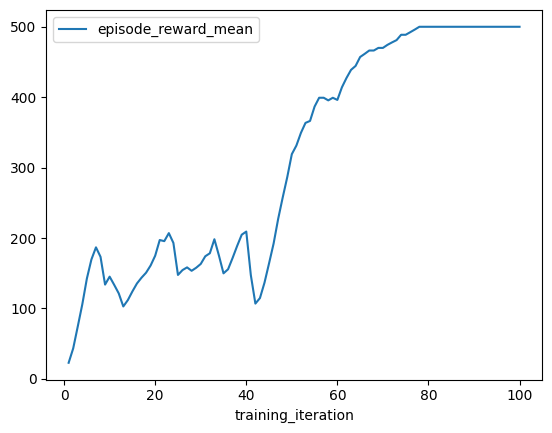

In [20]:
best_result.metrics_dataframe.plot("training_iteration", "episode_reward_mean")

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:792: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = leg.legendHandles
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:792: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = leg.legendHandles


Text(0, 0.5, 'Mean Test Reward')

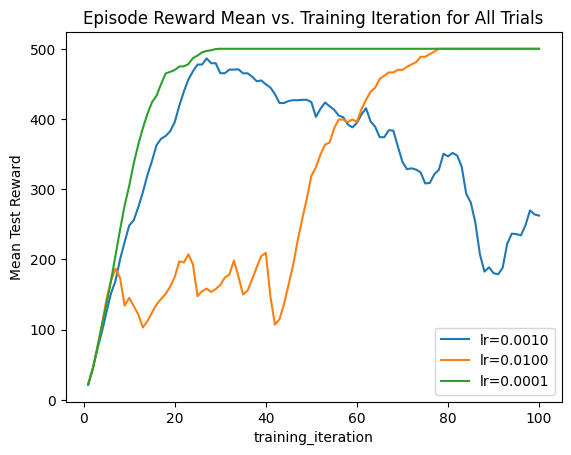

In [23]:
ax = None
for result in result_grid:
    label = f"lr={result.config['lr']:.4f}"
    if ax is None:
        ax = result.metrics_dataframe.plot("training_iteration", "episode_reward_mean", label=label)
    else:
        result.metrics_dataframe.plot("training_iteration", "episode_reward_mean", ax=ax, label=label)
ax.set_title("Episode Reward Mean vs. Training Iteration for All Trials")
ax.set_ylabel("Mean Test Reward")

Accessing checkpoints and loading for test inference

In [37]:
for result in result_grid:
    if result.metrics['config']['lr'] == 0.0001:
        result_lr00001 = result
    else:
        continue

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
# Render an episode and save as a GIF file
import gymnasium as gym
from ray.rllib.algorithms.algorithm import Algorithm
from IPython import display as ipythondisplay
from PIL import Image

# Get the last checkpoint from the above training run.
checkpoint = result_lr00001.checkpoint
# Create new Algorithm and restore its state from the last checkpoint.
algo = Algorithm.from_checkpoint(checkpoint)

# Create the env to do inference in.
env = gym.make("CartPole-v1", render_mode='rgb_array')
obs, info = env.reset()
screen = env.render()
images = [Image.fromarray(screen)]

episode_reward = 0.0

for i in range(100):
    env.render()
    # Compute an action ('a').
    a = algo.compute_single_action(obs)
    # Send the computed action 'a' to the env.
    obs, reward, done, truncated, _ = env.step(a)
    episode_reward += reward
    # Render screen every 10 steps
    if i % 10 == 0:
        screen = env.render()
        images.append(Image.fromarray(screen))

    if done:
        print(f"Episode done: Total reward = {episode_reward}")
        print("Episode finished after {} timesteps".format(i+1))
        break

algo.stop()

ray.shutdown()

image_file = '/content/cartpole-v1.gif'
# loop=0: loop forever, duration=1: play each frame for 1ms
images[0].save(
    image_file, save_all=True, append_images=images[1:], loop=0, duration=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/ray/rllib/algorithms/algorithm.py:483: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  return UnifiedLogger(config, logdir, loggers=None)
/usr/local/lib/python3.10/dist-packages/ray/tune/logger/unified.py:53: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
The `JsonLogger inte

In [40]:
!pip install tensorflow-docs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.6/183.6 kB 3.7 MB/s eta 0:00:00



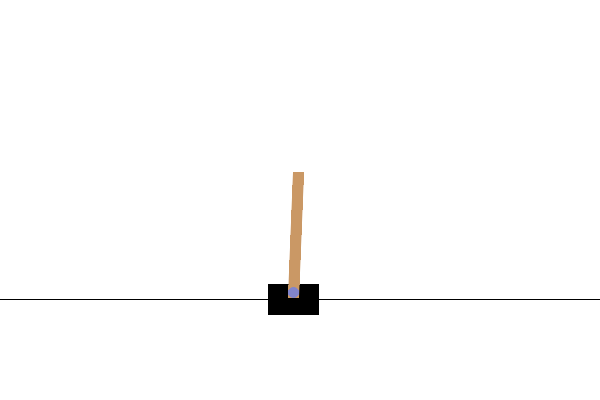

In [41]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(image_file)